Dataset: CodeSmells
  Unique fp_sol: 551
  Unique fp_sol2: 532
  Unique fp_bytecode: 551
  Unique fp_runtime: 504

Dataset: ContractFuzzer
  Unique fp_sol: 352
  Unique fp_sol2: 352
  Unique fp_bytecode: 274
  Unique fp_runtime: 349

Dataset: Doublade
  Unique fp_sol: 237
  Unique fp_sol2: 237
  Unique fp_bytecode: 184
  Unique fp_runtime: 181

Dataset: EthRacer
  Unique fp_sol: 109
  Unique fp_sol2: 109
  Unique fp_bytecode: 109
  Unique fp_runtime: 109

Dataset: EverEvolvingG
  Unique fp_sol: 264
  Unique fp_sol2: 264
  Unique fp_bytecode: 292
  Unique fp_runtime: 289

Dataset: JiuZhou
  Unique fp_sol: 164
  Unique fp_sol2: 162
  Unique fp_bytecode: 158
  Unique fp_runtime: 154

Dataset: NPChecker
  Unique fp_sol: 44
  Unique fp_sol2: 44
  Unique fp_bytecode: 44
  Unique fp_runtime: 43

Dataset: NotSoSmartC
  Unique fp_sol: 31
  Unique fp_sol2: 31
  Unique fp_bytecode: 9
  Unique fp_runtime: 9

Dataset: SBcurated
  Unique fp_sol: 126
  Unique fp_sol2: 126
  Unique fp_bytecode: 57
  U

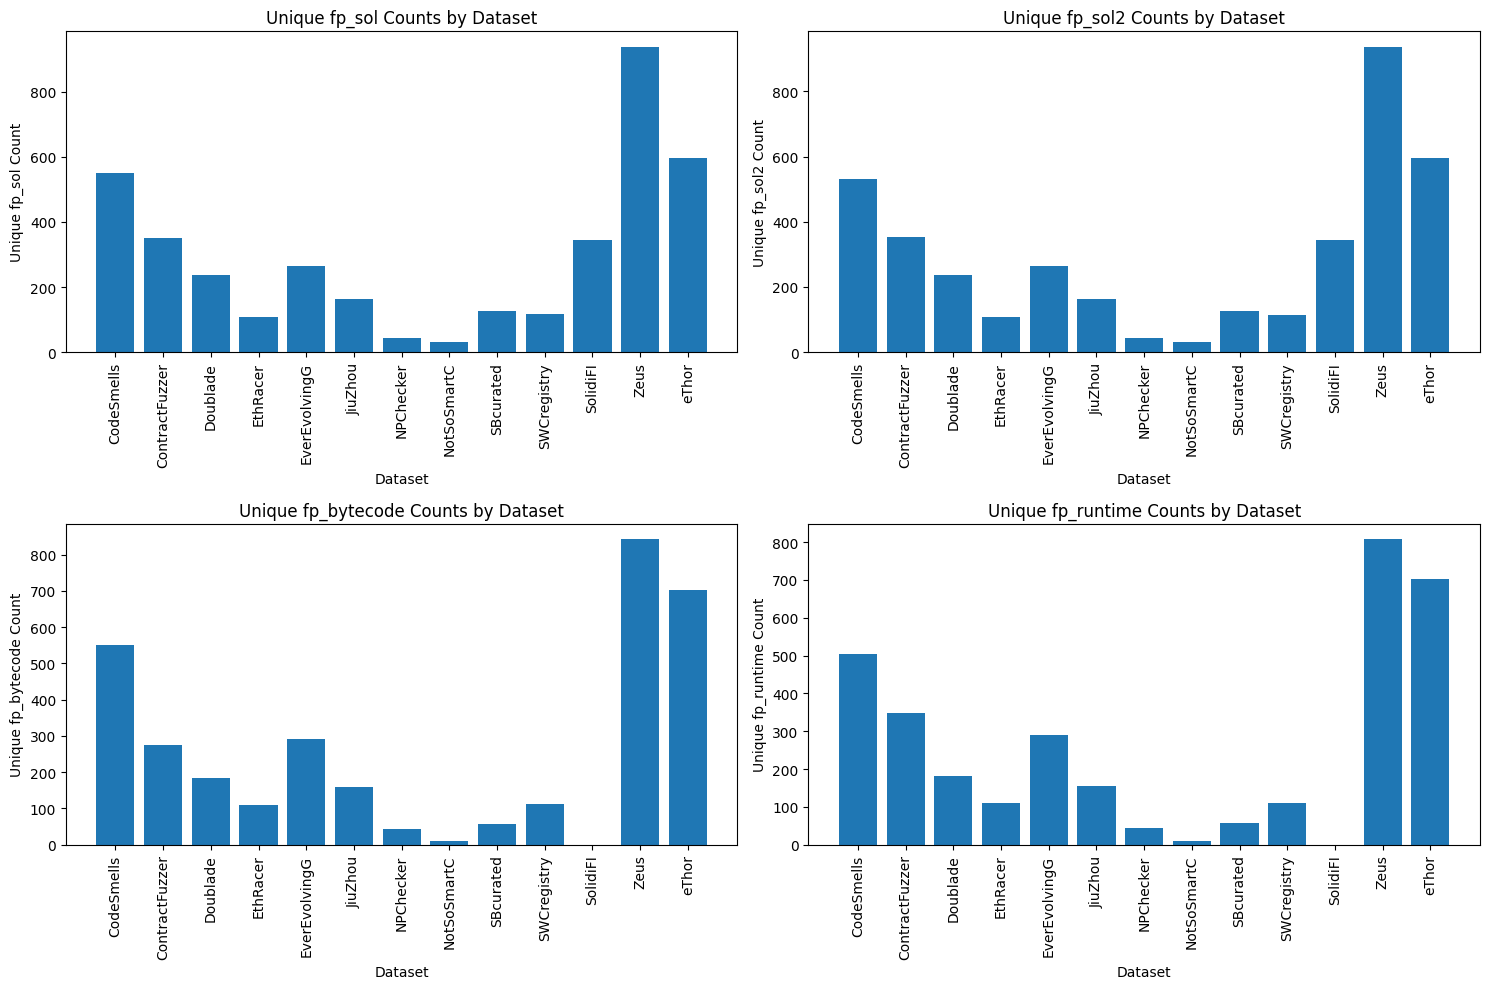

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../dataset/cgt/consolidated.csv'
df = pd.read_csv(file_path, sep=';')

# Group by the 'dataset' column and calculate unique counts for 'fp_sol', 'fp_sol2', 'fp_bytecode', and 'fp_runtime'
grouped = df.groupby('dataset').agg({
    'fp_sol': pd.Series.nunique,
    'fp_sol2': pd.Series.nunique,
    'fp_bytecode': pd.Series.nunique,
    'fp_runtime': pd.Series.nunique
}).reset_index()

# Calculate the total unique counts across all datasets
totals = grouped[['fp_sol', 'fp_sol2', 'fp_bytecode', 'fp_runtime']].sum().to_frame().T
totals['dataset'] = 'Total'
totals = totals[['dataset', 'fp_sol', 'fp_sol2', 'fp_bytecode', 'fp_runtime']]

# Append the totals row to the grouped DataFrame
grouped = pd.concat([grouped, totals], ignore_index=True)

# Convert 'dataset' column to string type
grouped['dataset'] = grouped['dataset'].astype(str)

# Separate the total row from the rest of the data
grouped_no_total = grouped[grouped['dataset'] != 'Total']

# Print the results
for index, row in grouped.iterrows():
    dataset = row['dataset']
    unique_fp_sol = row['fp_sol']
    unique_fp_sol2 = row['fp_sol2']
    unique_fp_bytecode = row['fp_bytecode']
    unique_fp_runtime = row['fp_runtime']
    print(f"Dataset: {dataset}")
    print(f"  Unique fp_sol: {unique_fp_sol}")
    print(f"  Unique fp_sol2: {unique_fp_sol2}")
    print(f"  Unique fp_bytecode: {unique_fp_bytecode}")
    print(f"  Unique fp_runtime: {unique_fp_runtime}")
    print()

# Plot histograms excluding the 'Total' row
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(grouped_no_total['dataset'], grouped_no_total['fp_sol'])
axs[0, 0].set_title('Unique fp_sol Counts by Dataset')
axs[0, 0].set_xlabel('Dataset')
axs[0, 0].set_ylabel('Unique fp_sol Count')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(grouped_no_total['dataset'], grouped_no_total['fp_sol2'])
axs[0, 1].set_title('Unique fp_sol2 Counts by Dataset')
axs[0, 1].set_xlabel('Dataset')
axs[0, 1].set_ylabel('Unique fp_sol2 Count')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(grouped_no_total['dataset'], grouped_no_total['fp_bytecode'])
axs[1, 0].set_title('Unique fp_bytecode Counts by Dataset')
axs[1, 0].set_xlabel('Dataset')
axs[1, 0].set_ylabel('Unique fp_bytecode Count')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(grouped_no_total['dataset'], grouped_no_total['fp_runtime'])
axs[1, 1].set_title('Unique fp_runtime Counts by Dataset')
axs[1, 1].set_xlabel('Dataset')
axs[1, 1].set_ylabel('Unique fp_runtime Count')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
